In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Business Understanding
# Tujuan: Memprediksi klasifikasi mobil berdasarkan berbagai atribut


In [ ]:
# 2. Data Understanding
# Membaca dataset
data = pd.read_excel('car-dataset.xlsx')


d:\Materi Ajar\Machine Learning Tutorial\venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [6]:
data

,buying price,maint price,doors number,persons capacity,lug_boot,safety estimated,car acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [5]:
# Menampilkan informasi dasar tentang dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1727 non-null   object
 1   maint price        1727 non-null   object
 2   doors number       1727 non-null   object
 3   persons capacity   1727 non-null   object
 4   lug_boot           1727 non-null   object
 5   safety estimated   1727 non-null   object
 6   car acceptability  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [7]:
print(data.describe())

       buying price maint price doors number persons capacity lug_boot  \
count          1727        1727         1727             1727     1727   
unique            4           4            4                3        3   
top            high        high            3                4      med   
freq            432         432          432              576      576   

       safety estimated car acceptability  
count              1727              1727  
unique                3                 4  
top                 med             unacc  
freq                576              1209  


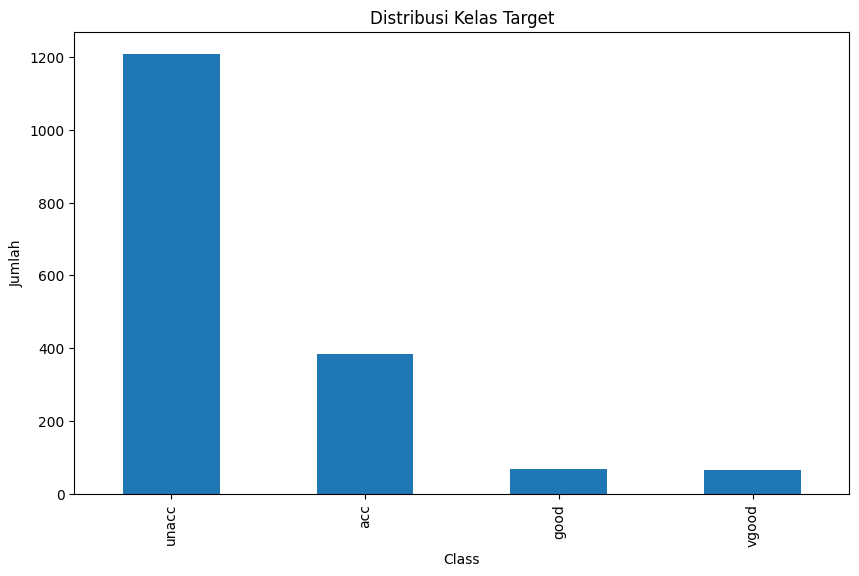

In [14]:
# Visualisasi distribusi kelas target
plt.figure(figsize=(10, 6))
data['car acceptability'].value_counts().plot(kind='bar')
plt.title('Distribusi Kelas Target')
plt.xlabel('Class')
plt.ylabel('Jumlah')
plt.show()

In [16]:
# 3. Data Preparation
# Cek missing values
print(data.isnull().sum())

buying price         0
maint price          0
doors number         0
persons capacity     0
lug_boot             0
safety estimated     0
car acceptability    0
dtype: int64


In [17]:
# Encoding variabel kategorikal
le = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = le.fit_transform(data[column])


In [18]:
# Memisahkan fitur dan target
X = data.drop('car acceptability', axis=1)
y = data['car acceptability']

In [19]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# 4. Modeling
# Mencoba dua model: Decision Tree dan Random Forest

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Mean CV Score:", dt_scores.mean())


Decision Tree Cross-Validation Scores: [0.98194946 0.97463768 0.97826087 0.97463768 0.97463768]
Decision Tree Mean CV Score: 0.9768246743054465


In [21]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean CV Score:", rf_scores.mean())

Random Forest Cross-Validation Scores: [0.96028881 0.9673913  0.97826087 0.95289855 0.9673913 ]
Random Forest Mean CV Score: 0.9652461675299534


In [22]:
# Memilih model dengan performa terbaik (dalam hal ini, Random Forest)
best_model = dt_model
best_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# 5. Evaluation
# Membuat prediksi
y_pred = best_model.predict(X_test)


In [24]:
# Menghitung metrik performa
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


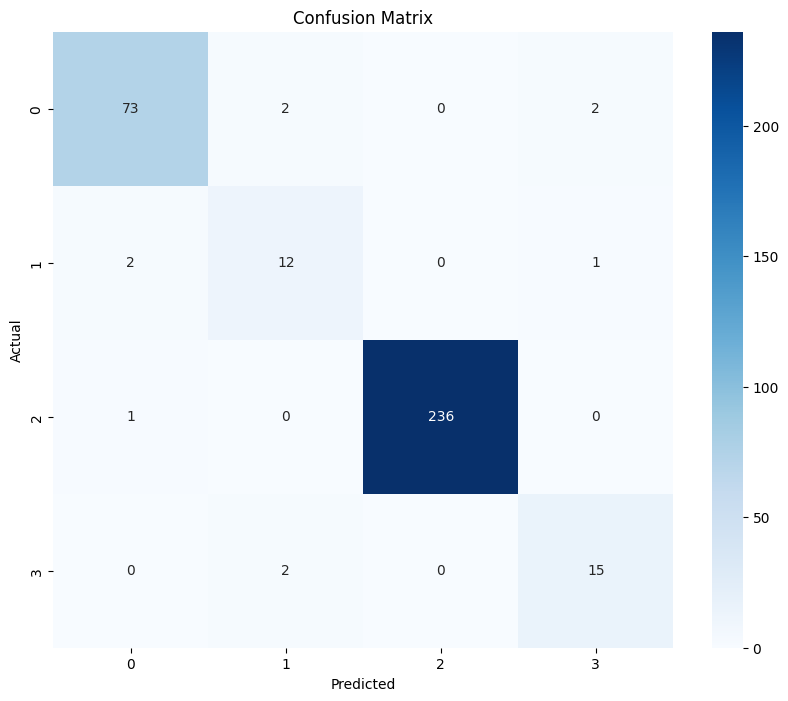

In [25]:
# Visualisasi confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

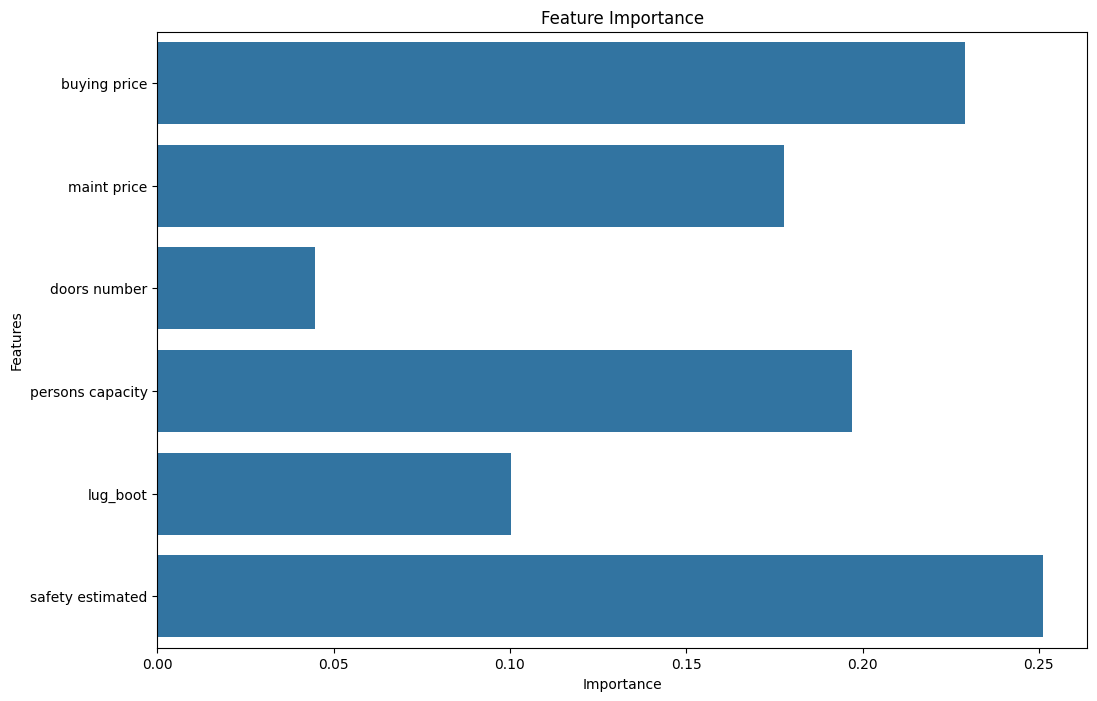

In [26]:
# Visualisasi feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [27]:
# 6. Deployment
# Contoh prediksi menggunakan model
new_data = X_test.iloc[0].to_frame().T  # Mengambil satu baris data sebagai contoh
prediction = best_model.predict(new_data)
print(f"Prediksi untuk data baru: {prediction[0]}")

Prediksi untuk data baru: 2
